In [43]:
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate

In [44]:
def read_images(folder, target_size=(100, 100)):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, target_size)  # Redimensionar imagen
            img = img.astype(np.float32) / 255.0  # Normalizar imagen
            images.append(img)
    return images

In [45]:
def flatten_images(images):
    flattened_images = np.array([img.flatten() for img in images])
    return flattened_images

In [46]:
def perform_pca(images, num_components):
    pca = PCA(n_components=num_components)
    pca.fit(images)
    return pca

In [47]:
def print_component_matrices(pca):
    print("Matriz de cada componente:")
    for i, component in enumerate(pca.components_):
        print(f"Componente {i+1}:")
        print(component)
        print()

In [48]:
def print_eigenvalues(pca):
    print("Eigenvalues:")
    print(pca.explained_variance_)
    print()

def print_explained_variance(pca):
    print("Explained variance:")
    print(pca.explained_variance_ratio_)
    print()

def print_loadings(pca):
    print("Loadings:")
    print(pca.components_.T * np.sqrt(pca.explained_variance_))
    print()

def plot_eigenvalues(pca):
    plt.plot(pca.explained_variance_)
    plt.xlabel('Component number')
    plt.ylabel('Eigenvalue')
    plt.title('Eigenvalues')
    plt.show()

def plot_explained_variance(pca):
    plt.plot(pca.explained_variance_ratio_)
    plt.xlabel('Component number')
    plt.ylabel('Explained variance')
    plt.title('Explained variance')
    plt.show()

def plot_loadings(pca):
    loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
    plt.plot(loadings)
    plt.xlabel('Feature number')
    plt.ylabel('Loading')
    plt.title('Loadings')
    plt.show()

def plot_pca_scatter(pca, images, labels):
    reduced_images = pca.transform(images)
    plt.scatter(reduced_images[:, 0], reduced_images[:, 1], c=labels)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA Scatter Plot')
    plt.show()

def plot_pca_scatter_3d(pca, images, labels):
    reduced_images = pca.transform(images)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(reduced_images[:, 0], reduced_images[:, 1], reduced_images[:, 2], c=labels)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title('PCA Scatter Plot')
    plt.show()

In [50]:
def plot_image_reconstruction(pca, images, num_components_to_keep=50):
    reconstructed_images = pca.inverse_transform(pca.transform(flatten_images(images)))
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    for i, ax in enumerate(axes.flat):
        ax.imshow(reconstructed_images[i].reshape(images[0].shape), cmap='gray')
        ax.axis('off')
        ax.set_title(f'Num Componentes: {num_components_to_keep}')
    plt.show()

Eigenvalues:
[170.96582    24.940382    7.563264    6.215431    5.574541    3.3239827
   2.5190427]

Explained variance:
[0.44148758 0.06440392 0.01953073 0.0160502  0.01439522 0.00858357
 0.00650496]

Loadings:
[[-0.02509048 -0.05820236  0.03464437 ...  0.02455471  0.02074706
  -0.00915801]
 [-0.03069165 -0.06319688  0.0331903  ...  0.01501816  0.01607999
  -0.02323339]
 [-0.03309237 -0.05958604  0.03019871 ...  0.01244636  0.02223541
  -0.02287992]
 ...
 [-0.08240512 -0.11952622  0.00576515 ... -0.0413668   0.00180928
  -0.0383229 ]
 [-0.07514492 -0.12229658  0.02951022 ... -0.0198708  -0.02229379
  -0.0499992 ]
 [-0.04992315 -0.10953353  0.06690945 ...  0.0485408   0.03279662
  -0.00880322]]



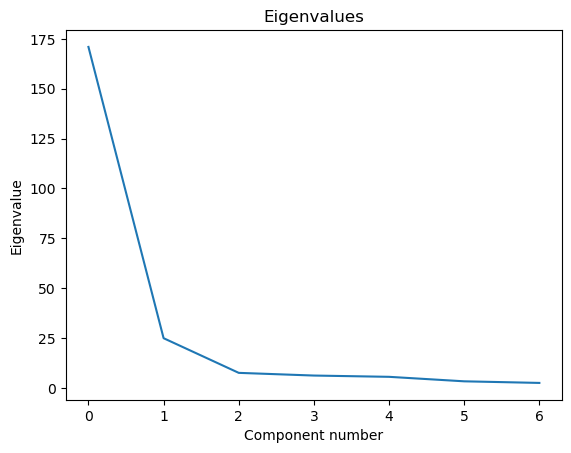

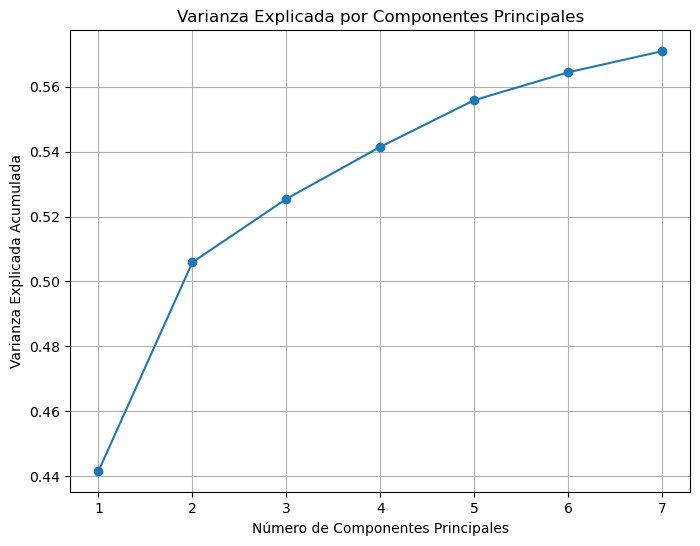

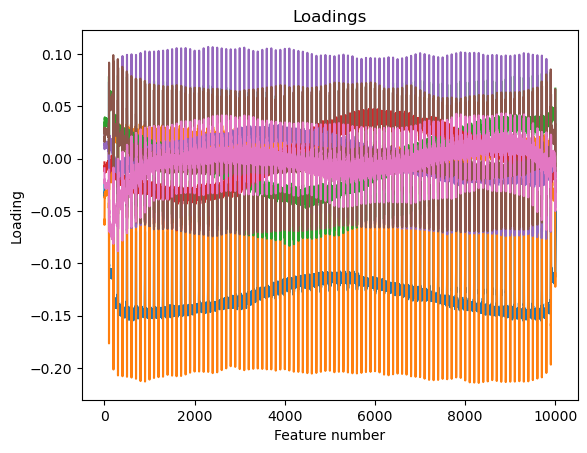

ValueError: 'c' argument has 10 elements, which is inconsistent with 'x' and 'y' with size 2000.

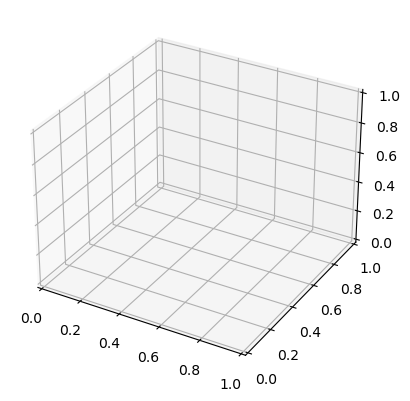

In [52]:
folder = './images'

images = read_images(folder)

flattened_images = flatten_images(images)

num_components = 7  # Elegi 7 ya que es la varianza explicada a partir de este numero no mejora significativamente teniendo mas comoponentes
pca = perform_pca(flattened_images, num_components)

# plot_image_reconstruction(pca, images)
print_eigenvalues(pca)
print_explained_variance(pca)
print_loadings(pca)
plot_eigenvalues(pca)
plot_explained_variance(pca)
plot_loadings(pca)